In [1]:
from typing import Tuple

import random
import zipfile
import pandas as pd

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
import pytorch_lightning as pl

from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/home/loic/.cache/pypoetry/virtualenvs/introduction-ia-terminale-FEK24HKi-py3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Introduction en Intelligence Artificielle

Bienvenue dans ce notebook, je vais tenter de vous introduire au domaine de l'**intelligence artificielle** (alias IA).

## Comment définir le terme intelligence artificielle ? C'est quoi une IA ?

L'intelligence artificielle n'est autre que la construction et l'utilisation d'**algorithmes** qui vont **aider**/**soutenir** une personne dans son travail/quotidien. Autrement dit, de **réduire la charge mentale/physique** d'une personne.  
En une phrase, nous parlons de **systèmes décisionnels** car ces algorithmes ont la responsabilité de prendre des décisions.

## Ok mais à quoi ça sert ?
Excellente question ! Il faut savoir que c'est un domaine qui est un **croisement de toutes les sciences** que nous connaissons aujourd'hui. En effet, l'**IA** peut être utilisé dans tous les domaines scientifiques, aussi bien en **physique** (ex : modélisation des phénomènes, simulation), en **chimie** (ex : découverte de propriétés chimiques) qu'en **médecine** (ex : diagnostique de cancer de la peau).

Vous l'aurez compris, avec l'intelligence artificielle nous avons une infinité de possibilité et de projets intéressants, mystérieux et stimulants.

## Suis-je moi même exposé à l'intelligence artificielle ?
Nous y faisons face au quotidien ... Avez vous un **smartphone** ? Êtes vous inscris sur **Facebook** ? Commandez vous sur **Amazon** ? Naviguez vous avec **Google** ? Jouez-vous aux **jeux-vidéos** ?  
Bon ok, j'arrête avec mes questions stupides, je vais plutôt vous apporter les réponses à ses questions, et je vais même aller plus loin en vous présentant des sujets d'actualités autant *délirant* que *fous* !

1. Les smartphones, et plus généralement les ordinateurs. Prenez l'exemple de **SIRI** sur iPhone, vos demandes vocales sont analysées par un **modèle** (ou algorithme) d'IA afin de les comprendre et d'y répondre au mieux. Il en va de même pour **cortana** sur un ordinateur fonctionnant sur Windows 10/11. 

2. Facebook et Amazon sont deux entreprises qui collectent et analyse vos données afin de vous **recommander** du contenu adapté à vos goûts, que ce soit la dernière carte graphique à acheter sur Amazon, où un article sur les derniers résultats de la KCorp sur Facebook.

3. Google ... Le mal ou le bien ? Nombreuses sont les personnes qui clament que Google vous connaissent mieux que vos propres parents. En effet, au travers de vos recherches, Google accumule des informations sur vous et sont capables de **dresser votre profil** afin de mieux vous **cibler les publicités**.

4. Les jeux-vidéos oui ! Quand vous jouez à GTA V et que vous placez un point de repère sur la carte. Le parcours le plus court à suivre est calculé à l'aide d'un algorithme d'IA. Plus classique, je peux vous citer les monstres que vous combattez dans Elden Ring, vos adversaires dans Takken ou bien les ennemis dans Call of Duty.

## L'IA c'est aussi ça
*Ah ouais quand même, c'est pas rien ! T'as pas plus excitant comme applications ?*  
Bon si vous le demandez, parlons des modèles les plus surprenants !

1. Quel est le point commun entre ces deux personnes ?  
<img src="../../images/person_1.jpeg" alt="drawing" width="200"/>
<img src="../../images/person_2.jpeg" alt="drawing" width="200"/>

<details>
    <summary>Réponse</summary>
    Elles n'existent tout simplement pas ! Ces visages ont été générées aléatoirement par un algorithme.</br>
    <a href="https://thispersondoesnotexist.com/">Pour en voir plus</a>
</details>

2. Des oeuvres d'arts générés par un algorithme  
On décrit ce que l'on souhaite généré, par exemple *un fauteuil en forme d'avocat* et on observe les résultats :  
<img src="../../images/chaise_avocat_1.png" alt="drawing" width="150"/>
<img src="../../images/chaise_avocat_2.png" alt="drawing" width="150"/>
<img src="../../images/chaise_avocat_3.png" alt="drawing" width="150"/>[  
[Site source](https://openai.com/blog/dall-e/)

3. Une petite vidéo de bagnoles pour changer  
[Vidéo voiture autonome (Tesla)](https://www.youtube.com/watch?v=tlThdr3O5Qo)

4. On peut aussi s'imaginer converser avec un robot un jour :  
Des modèles permettent de comprendre le langage, on pourrait communiquer avec ou avoir des réponses à nos questions existentielles. Exemple avec un modèle de langue français :  
Saisie : `Le camembert est un <à deviner>`.  
Réponse du modèle : fromage, produit, dessert, aliment, incontournable.

## Passons aux choses sérieuses, construisons notre premier modèle !

Hop hop hop, avant de se lancer dans le coeur de l'intelligence artificielle, il est important de mentionner que bien que ce soit un croisement des domaines scientifiques, l'accès à ce domaine spécifique est large. Si vous voulez travailler dans le domaine, **plusieurs voies sont possibles**, les profils sont divers et variés et ont majoritairement suivi ces formations :
- *Informatique*
- *Physique*
- *Éléctronique*
- *Mathématiques*

Le point commun de tous ces domaines sont les **mathématiques**. C'est de mon point de vue, le meilleur domaine d'application des mathématiques. En effet, bien que les mathématiques soient (à tord) détester des élèves, l'IA est l'un des rares domaines qui va vous faire aimer les maths !

Si je vous prends un exemple, les fonctions affines de la forme : $y = ax + b$ est à la base de beaucoup de modèles/algorithmes en IA ! On en verra un cas d'exemple un peu plus tard !  
Sinon $y = ax + b$ est **LA BASE** dans l'un des domaines que vous avez sûrement dû entendre parler ... Les **réseaux de neurones** !

### Première étude de cas sur le diabète

J'ai oublié de vous parler de l'**or** des professionnels en intelligence artificielle : **les données**.  
[Les données ne sont autres que des informations qui sont utilisés dans le but d'être traitées informatiquement](https://www.larousse.fr/dictionnaires/francais/donn%C3%A9e/26436).

Je préfère plutôt décrire les données comme un ensemble de mesures décrivant un concept.

**Dans notre cas quelles données allons nous utiliser ?**  
Excellente question ! Dans ce premier cas de figure, nous utiliserons des données de santé, et plus précisément sur le diabète !  
Attention, je ne me prétends pas médecin, **mais** j'utilise des mesures d'une expérimentation effectuée dans un cadre médicale et scientifique. Nos conclusions peuvent être tout à fait honnête et qui va dans le sens de nos données. Autrement dit, sans être expert, juste avec les bonnes données, nous pouvons étudier et tirer des conclusions sur des phénomènes qui seraient potentiellement liés. C'est l'une des raisons qui poussent les entreprises à avoir besoin de nous au quotidien.

In [2]:
# Téléchargement, extraction et chargement des données sur le diabète
!kaggle datasets download -d mathchi/diabetes-data-set -p ../../data/

with zipfile.ZipFile('../../data/diabetes-data-set.zip', 'r') as zip_ref:
    zip_ref.extract('diabetes.csv', path='../../data/')

df = pd.read_csv('../../data/diabetes.csv')

diabetes-data-set.zip: Skipping, found more recently modified local copy (use --force to force download)


Maintenant que nous avons ouvert nos données, regardons à quoi elles ressemblent un peu plus en détail.

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


À première vue, nous avons accès aux informations suivantes :
- Pregnancies : Le nombre de fois où la personne a été enceinte.
- Glucose : La concentration de glucose dans le sang 2 heures après un test de tolérance au glucose.
- BloodPressure : La pression sanguine en mm HG.
- SkinThickness : L'épaisseur de la peau au niveau du triceps en mm.
- Insulin : Le taux d'insuline dans un serum en mu U/ml.
- BMI : L'indice de masse corporelle (IMC) en kg/m^2.
- DiabetesPedigreeFunction : Une fonction sur les antécédents diabétiques.
- Age : L'âge de la personne.
- Outcome : Si la personne est diabétique (1) ou non (0).

Je ne sais pas si vous vous posez la même question que moi, mais la voici :  
*Sommes nous capables de savoir quel(s) est/sont le(s) facteur(s) qui impact le plus le fait d'être diabétique ?*

Pour avoir une réponse je vous propose que l'on construise un modèle tout simple qui se base sur cette fonction :
$$y_{Outcome} = \beta_0 + \beta_1 \times x_{Pregnancies} + \beta_2 \times x_{Glucose} + \beta_3 \times x_{BloodPressure} + \beta_4 \times x_{SkinThickness} + \beta_5 \times x_{Insulin} + \beta_6 \times x_{BMI} + \beta_7 \times x_{DiabetesPedigreeFunction} + \beta_8 \times x_{Age}$$
avec $x$ notre exemple, $x_i$ la donnée de la mesure de $i$ de l'exemple et $\beta_i$ le coefficient associé à la mesure.

Vous l'aurez peut être compris, mais ce que l'on cherche à **apprendre**/**déterminer** sont les coefficients $\beta$.

**Remarque :**  
Vous n'avez pas remarqué quelque chose ? La forme de l'équation précédente ne vous dit rien ? AH bah oui quand même !!!
$$y = \boldsymbol\beta \cdot \textbf{x} + \beta_0$$
Une forme linéaire avec des vecteurs !

In [4]:
X_data = df.drop(columns=['Outcome']).to_numpy()
y_data = df['Outcome'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=10)

lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train, y_train)

mean_acc = lr_model.score(X_test, y_test)

print(f"Notre modèle est arrivé à prédire correctement {mean_acc*100:0.2f}% cas de personne avec ou sans diabète.")

Notre modèle est arrivé à prédire correctement 76.62% cas de personne avec ou sans diabète.


C'est pas mal mais cela devrait suffire pour essayer de comprendre quels seraient les facteurs potentiels qui impacteraient le plus sur le diabète.  
Pour déterminer les facteurs importants nous allons nous pencher vers les coefficients. Le facteur qui aura la valeur la plus élevée nous indiquera celle qui va faire en sorte que notre prédiction tende vers 1, autrement dit vers la présence du diabète.

In [5]:
lr_model.coef_

array([[ 0.08943846,  0.03524706, -0.01167035,  0.00871026, -0.00136943,
         0.07400415,  0.68322278,  0.02510982]])

Un coefficient semblent se démarquer des autres. Ce coefficient est attribué au facteur *DiabetesPedigreeFunction*. Plus cette valeur augmente, plus la probabilité d'être diabétique est élevé d'après le modèle.

### Deuxième étude : Les nombres et les réseaux de neurones

Dans ce deuxième cas, nous allons plus nous pencher sur l'apprentissage d'un réseau de neurones avec un petit exemple classique : la reconnaissance du chiffre dans l'image présentée.

In [6]:
%%capture mnist_download

# Téléchargement des données
mnist_dataset = MNIST(root="../../data/", download=True, transform=ToTensor())

Maintenant que nous avons téléchargé, puis chargé les données dans notre variable `mnist_dataset`, observons les données que nous avons afin de savoir à quoi s'attendre !

In [7]:
image, _ = mnist_dataset[0]

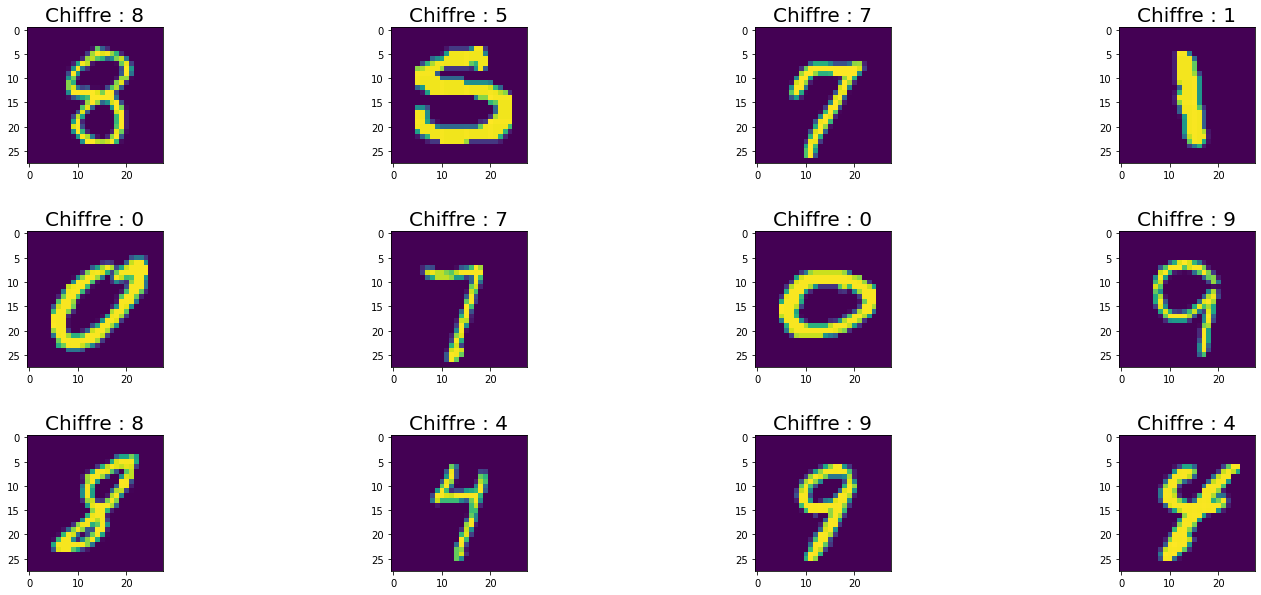

In [8]:
fig = plt.figure(figsize=(25, 10))
columns = 4
rows = 3

random_indexes = random.sample(
    list(
        range(len(mnist_dataset))
    ), k=columns * rows
)
for i in range(columns * rows):
    image, label = mnist_dataset[random_indexes[i]]
    image = np.asarray(image.squeeze())
    ax = fig.add_subplot(rows, columns, i+1)
    ax.set_title(f"Chiffre : {label}", fontdict={'fontsize': 20})
    plt.imshow(image)

plt.subplots_adjust(hspace=0.5)
plt.show()

Nous savons maintenant à quoi ressemble nos données. Ce sont des images 28x28 pixels.  
Maintenant réfléchissons à comment pouvons nous faire en sorte qu'un modèle mathématiques puisse les reconnaitre !

In [9]:
class BaretNeuralNetwork(pl.LightningModule):
    def __init__(self, image_height: int=28, image_width: int=28, outputs_number: int=10, **kwargs) -> None:
        super(BaretNeuralNetwork, self).__init__(**kwargs)
        self.linear = nn.Linear(in_features=image_height*image_width, out_features=outputs_number)
        self.loss_function = nn.CrossEntropyLoss()
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, flattened_image: torch.Tensor) -> torch.Tensor:
        y = self.linear(flattened_image)
        return y
    
    def configure_optimizers(self) -> torch.optim.Optimizer:
        optimizer = torch.optim.SGD(self.parameters(), lr=1e-3)
        return optimizer
    
    def training_step(self, train_batch: Tuple[torch.Tensor, torch.Tensor], batch_id: int) -> torch.Tensor:
        images, targets = train_batch
        images = images.flatten(start_dim=1)
        outputs = self.linear(images)
        loss = self.loss_function(outputs, targets)
        self.log('train_loss', loss)
        return loss

    def _compute_accuracy(self, model_outputs: torch.Tensor, targets: torch.Tensor) -> float:
        y = model_outputs.cpu()
        y = self.softmax(y)
        y = torch.argmax(y, dim=1)
        return accuracy_score(targets.cpu(), y) * 100

    def test_step(self, test_batch: Tuple[torch.Tensor, torch.Tensor], batch_id: int) -> torch.Tensor:
        images, targets = test_batch
        images = images.flatten(start_dim=1)
        outputs = self.linear(images)
        loss = self.loss_function(outputs, targets)
        accuracy = self._compute_accuracy(outputs, targets)
        self.log_dict({'test_loss': loss, 'test_accuracy': accuracy})
        return loss

    def predict_step(self, predict_batch: torch.Tensor, batch_id: int) -> torch.Tensor:
        images = predict_batch
        images = images.flatten(start_dim=1)
        outputs = self.linear(images)
        outputs_proba = self.softmax(outputs)
        return torch.argmax(outputs_proba, dim=1)

Configurons l'entrainement de notre modèle.  
Premièrement, nous devons séparer notre jeu de données en plusieurs parties :
- *Entrainement* : les données de cette partie sont utilisées pour entrainer notre modèle.
- *Test* : nous les utilisons pour avoir un retour final après l'entrainement de notre modèle. C'est important de savoir si notre modèle a bien généralisé son apprentissage, c'est à dire qu'il ne performe pas uniquement sur les données vues à l'entrainement.
- *Prédiction* : quelques exemples qui nous montreront ce que le modèle prédit sur quelques données à part.

In [10]:
epochs = 20 # Nombre de fois que le modèle va voir les données d'entrainement (en entier)
train_ratio, test_ratio, predict_ratio = (0.8, 0.1, 0.1)
total_size = len(mnist_dataset)
train_size = int(train_ratio * total_size)
test_size = int(test_ratio * total_size)
predict_size = total_size - train_size - test_size

train_set, test_set, predict_set = random_split(mnist_dataset, [train_size, test_size, predict_size], generator=torch.Generator().manual_seed(42))
train_loader = DataLoader(train_set, batch_size=64, shuffle=False, num_workers=4)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False, num_workers=4)

accelerator = 'gpu' if torch.cuda.is_available() else 'cpu'
trainer = pl.Trainer(max_epochs=epochs, accelerator=accelerator, enable_checkpointing=False)

model = BaretNeuralNetwork(image_height=28, image_width=28, outputs_number=10)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


#### Entrainement

In [11]:
trainer.fit(model, train_dataloaders=train_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | linear        | Linear           | 7.9 K 
1 | loss_function | CrossEntropyLoss | 0     
2 | softmax       | Softmax          | 0     
---------------------------------------------------
7.9 K     Trainable params
0         Non-trainable params
7.9 K     Total params
0.031     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 750/750 [00:05<00:00, 128.78it/s, loss=0.528, v_num=6]


#### Test

In [12]:
trainer.test(model, dataloaders=test_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|██████████| 94/94 [00:00<00:00, 210.31it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy          86.61666666666666
        test_loss           0.5470705628395081
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.5470705628395081, 'test_accuracy': 86.61666666666666}]

Nous passons à l'analyse des poids, pour comprendre ce que notre modèle a appris au niveau des pixels !

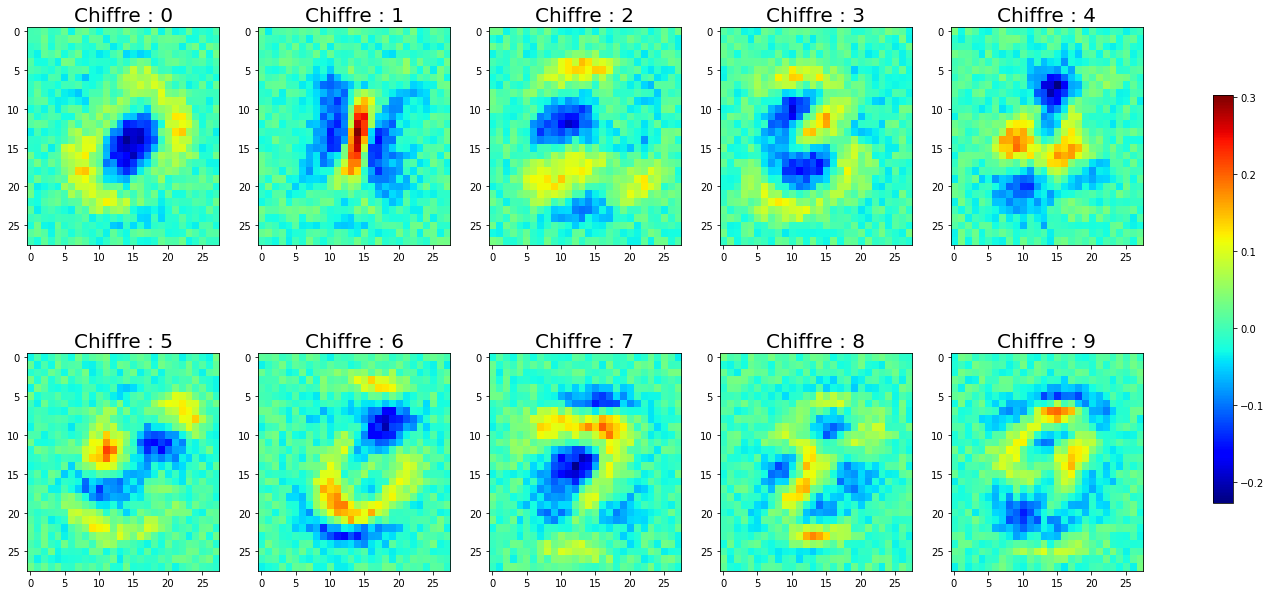

In [40]:
weights = model.linear.weight.detach() # Les paramètres du réseau qui ont été appris
vmin = weights.min()
vmax = weights.max()

fig = plt.figure(figsize=(25, 10))
columns = 5
rows = 2

for i in range(columns * rows):
    image = weights[i].view(28, 28)
    ax = fig.add_subplot(rows, columns, i+1)
    ax.set_title(f"Chiffre : {i}", fontdict={'fontsize': 20})
    img_map = plt.imshow(image, vmin=vmin, vmax=vmax, cmap='jet', aspect='auto')

plt.subplots_adjust(hspace=0.5)
fig.colorbar(img_map, ax=fig.axes, shrink=0.75)
plt.show()

\# TODO : Ajouter une explication de l'architecture avec une courte explication mathématiques